In [2]:
## PM2P5 PREDICTION ##

import xarray as xr

nc = xr.open_dataset('air_March_15.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_mar_15.csv')

nc = xr.open_dataset('air_April_May_15.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_apr_may_15.csv')

nc = xr.open_dataset('air_March_16.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_mar_16.csv')

nc = xr.open_dataset('air_April_May_16.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_apr_may_16.csv')

nc = xr.open_dataset('air_March_17.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_mar_17.csv')

nc = xr.open_dataset('air_April_May_17.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_apr_may_17.csv')

nc = xr.open_dataset('air_March_18.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_mar_18.csv')

nc = xr.open_dataset('air_April_18.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_apr_18.csv')

nc = xr.open_dataset('air_May_18.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_may_18.csv')

nc = xr.open_dataset('air_March_19.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_mar_19.csv')

nc = xr.open_dataset('air_April_19.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_apr_19.csv')

nc = xr.open_dataset('air_May_19.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_may_19.csv')

nc = xr.open_dataset('air_March_20.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_mar_20.csv')

nc = xr.open_dataset('air_April_20.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_apr_20.csv')

nc = xr.open_dataset('air_May_20.nc')
nc.pm2p5.to_dataframe().to_csv('pm2p5_may_20.csv')

In [3]:
import pandas as pd
df1 = pd.read_csv('pm2p5_mar_15.csv', parse_dates=['time'])
df2 = pd.read_csv('pm2p5_apr_may_15.csv', parse_dates=['time'])
df3 = pd.read_csv('pm2p5_mar_16.csv', parse_dates=['time'])
df4 = pd.read_csv('pm2p5_apr_may_16.csv', parse_dates=['time'])
df5 = pd.read_csv('pm2p5_mar_17.csv', parse_dates=['time'])
df6 = pd.read_csv('pm2p5_apr_may_17.csv', parse_dates=['time'])
df7 = pd.read_csv('pm2p5_mar_18.csv', parse_dates=['time'])
df8 = pd.read_csv('pm2p5_apr_18.csv', parse_dates=['time'])
df9 = pd.read_csv('pm2p5_may_18.csv', parse_dates=['time'])
df10 = pd.read_csv('pm2p5_mar_19.csv', parse_dates=['time'])
df11 = pd.read_csv('pm2p5_apr_19.csv', parse_dates=['time'])
df12 = pd.read_csv('pm2p5_may_19.csv', parse_dates=['time'])
df13 = pd.read_csv('pm2p5_mar_20.csv', parse_dates=['time'])
df14 = pd.read_csv('pm2p5_apr_20.csv', parse_dates=['time'])
df15 = pd.read_csv('pm2p5_may_20.csv', parse_dates=['time'])

In [4]:
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df = df7.append(df8)
df = df.append(df9)
df = df.append(df10)
df = df.append(df11)
df = df.append(df12)
df = df.append(df13)
df = df.append(df14)
df = df.append(df15)

In [499]:
# df['time'] = pd.to_datetime(df['time'], errors='coerce')
df.index = pd.to_datetime(df.index, unit='s')

In [500]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [501]:
cols = ['latitude','longitude']
df.drop(cols, axis=1, inplace=True)

In [503]:
df

,time,pm2p5
1970-01-01 00:00:00,2015-03-01 12:00:00,3.960974e-08
1970-01-01 00:00:01,2015-03-01 12:00:00,3.970538e-08
1970-01-01 00:00:02,2015-03-01 12:00:00,4.386194e-08
1970-01-01 00:00:03,2015-03-01 12:00:00,5.141977e-08
1970-01-01 00:00:04,2015-03-01 12:00:00,5.201076e-08
...,...,...
1970-01-01 00:17:55,2020-05-30 12:00:00,7.808372e-08
1970-01-01 00:17:56,2020-05-30 12:00:00,7.888689e-08
1970-01-01 00:17:57,2020-05-30 12:00:00,7.529859e-08
1970-01-01 00:17:58,2020-05-30 12:00:00,7.739355e-08


In [504]:
df.time = pd.to_datetime(df.time)
df = df.groupby(pd.Grouper(key='time', freq='1M')).sum() # groupby each 1 month
# df.index = df.index.strftime('%Y-%m')

In [506]:
df

,pm2p5
time,
2015-03-31,0.000058
2015-04-30,0.000051
2015-05-31,0.000056
2015-06-30,0.000000
2015-07-31,0.000000
...,...
2020-01-31,0.000000
2020-02-29,0.000000
2020-03-31,0.000061


In [507]:
y = df['pm2p5'].resample('MS').mean()

In [508]:
y

time
2015-03-01    0.000058
2015-04-01    0.000051
2015-05-01    0.000056
2015-06-01    0.000000
2015-07-01    0.000000
                ...   
2020-01-01    0.000000
2020-02-01    0.000000
2020-03-01    0.000061
2020-04-01    0.000038
2020-05-01    0.000047
Freq: MS, Name: pm2p5, Length: 63, dtype: float64

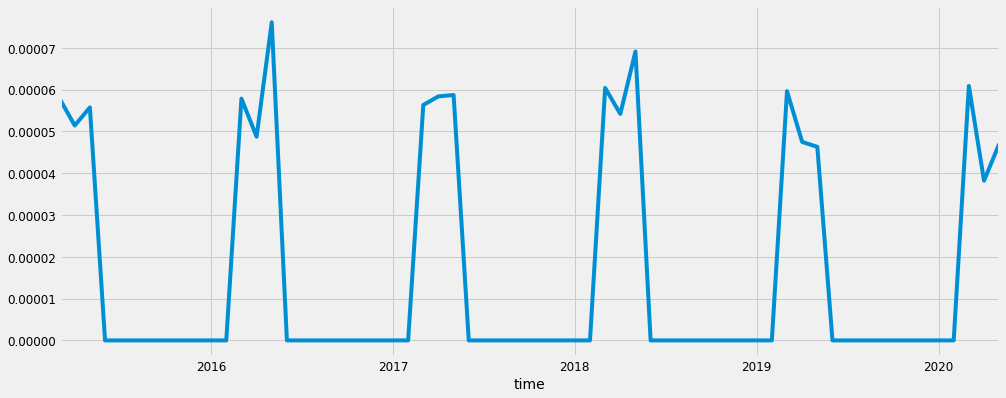

In [509]:
y.plot(figsize=(15, 6))
plt.show()

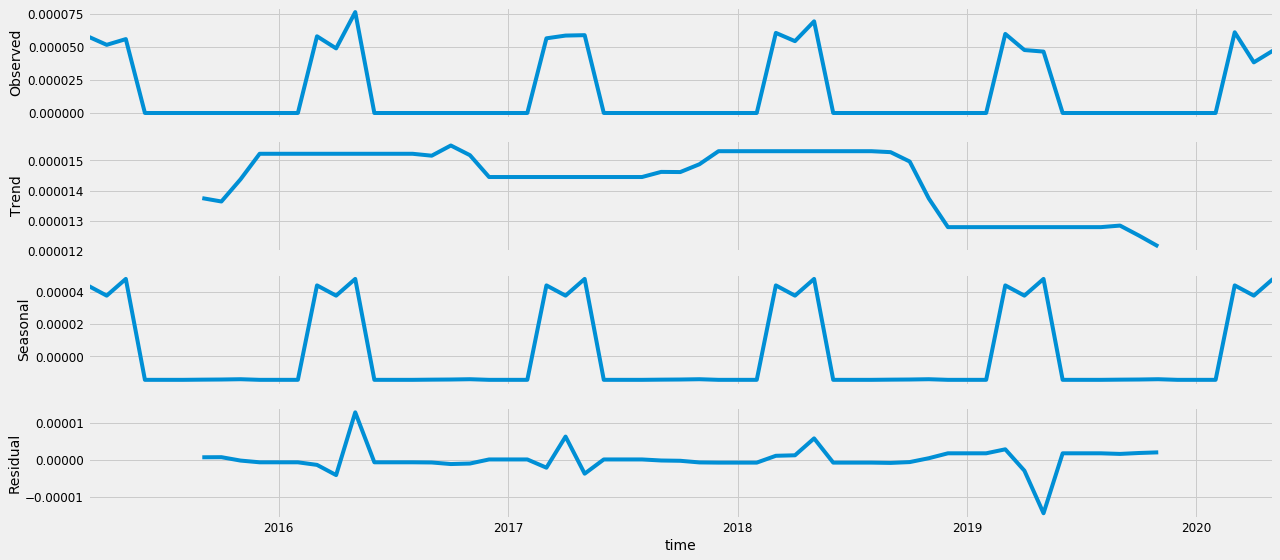

In [510]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [511]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [512]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-1115.4991824645563
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-923.2693064642165
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-1062.7723018620184
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-769.3454055456644
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-1085.9365030333759
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-1056.149165806607
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-849.2292287467429
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-831.2874013938463
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-1112.6033664854685
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-908.9847071453491
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-1031.4473388187273
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-748.2661375783726
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-1066.9445912547335
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-1018.7012270881214
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-845.402860083148
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-726.5625061582558
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-1116.9863611878752
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-910

In [513]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1460   8.82e-10  -1.66e+08      0.000      -0.146      -0.146
ma.L1         -0.6496   1.98e-10  -3.28e+09      0.000      -0.650      -0.650
ar.S.L12      -0.7844    5.9e-09  -1.33e+08      0.000      -0.784      -0.784
sigma2          1e-10   1.28e-09      0.078      0.937    -2.4e-09     2.6e-09


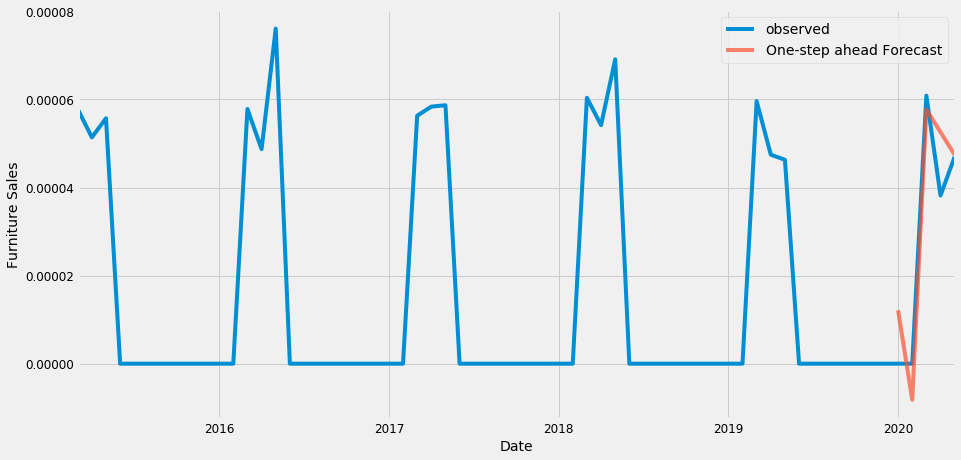

In [514]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()